In [ ]:
!git clone https://github.com/clovaai/donut.git
!cd donut && pip install .


fatal: destination path 'donut' already exists and is not an empty directory.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Processing /content/donut
  Preparing metadata (setup.py) ... done
  Created wheel for donut-python: filename=donut_python-1.0.9-py3-none-any.whl size=21376 sha256=eb6fc591a9ca5b289a34852e928996c4c0bec5b54943c666ac4988305dbbc2a0
  Stored in directory: /tmp/pip-ephem-wheel-cache-mro0bvjk/wheels/82/17/62/c35a3fb61145bf5972f479bf4eec242ed5786cfbdf2b2a5642
Successfully built donut-python
  Attempting uninstall: donut-python
    Found existing installation: donut-python 1.0.9
    Uninstalling donut-python-1.0.9:
      Successfully uninstalled donut-python-1.0.9
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from transformers import DonutProcessor, VisionEncoderDecoderModel
from transformers import VisionEncoder
from transformers import AutoModelForSeq2SeqLM
from transformers import EncoderDecoderModel



decoder = AutoModelForSeq2SeqLM.from_pretrained("TurkuNLP/wikibert-base-lv-cased")
encoder = VisionEncoder.from_pretrained("naver-clova-ix/donut-base-finetuned-cord-v2")

processor = DonutProcessor.from_pretrained("naver-clova-ix/donut-base-finetuned-cord-v2")
model = EncoderDecoderModel(encoder=encoder, decoder=decoder)
#model = VisionEncoderDecoderModel.from_pretrained("naver-clova-ix/donut-base-finetuned-cord-v2")

RuntimeError: ignored

In [ ]:

from PIL import Image
image = Image.open("/content/rec1.jpg").convert("RGB")
image

In [ ]:
pixel_values = processor(image, return_tensors="pt").pixel_values
print(pixel_values.shape)

torch.Size([1, 3, 1280, 960])


In [ ]:
import torch

task_prompt = "<s_cord-v2>"
decoder_input_ids = processor.tokenizer(task_prompt, add_special_tokens=False, return_tensors="pt")["input_ids"]

device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)

outputs = model.generate(pixel_values.to(device),
                               decoder_input_ids=decoder_input_ids.to(device),
                               max_length=model.decoder.config.max_position_embeddings,
                               early_stopping=True,
                               pad_token_id=processor.tokenizer.pad_token_id,
                               eos_token_id=processor.tokenizer.eos_token_id,
                               use_cache=True,
                               num_beams=1,
                               bad_words_ids=[[processor.tokenizer.unk_token_id]],
                               return_dict_in_generate=True,
                               output_scores=True,)
     

In [ ]:

import re

sequence = processor.batch_decode(outputs.sequences)[0]
sequence = sequence.replace(processor.tokenizer.eos_token, "").replace(processor.tokenizer.pad_token, "")
sequence = re.sub(r"<.*?>", "", sequence, count=1).strip()  # remove first task start token
print(sequence)
     

<s_menu><s_nm> SIA "A. G.A. LTD"</s_nm><s_unitprice> 4170200458</s_unitprice><s_cnt> 7</s_cnt><s_price> Rp. PVN LV</s_nm><s_unitprice> 1611000201</s_unitprice><s_cnt> 7</s_cnt><s_price> Rp. Saba Saba Saba Saba Saba Saba Saba Saba Saba Saba Saba Saba Saba Saba Saba Saba Saba Saba Saba Saba Saba Saba Saba Saba Saba Saba Saba Saba Saba Saba Saba Saba Saba Saba Saba Saba Saba Saba Saba Saba Saba Saba Saba Saba Saba Saba Saba Saba Saba Saba Saba Saba Saba Saba Saba Saba Saba Saba Saba Saba Saba Saba Saba Saba Saba Saba Saba Saba Saba Saba Saba Saba Saba Saba Saba Saba Saba Saba Saba Saba Saba Saba Saba Saba Saba Saba Saba Saba Saba Saba Saba Saba Saba Saba Saba Saba Saba Saba Saba Saba Saba Saba Saba Saba Saba Saba Saba Saba Saba Saba Saba Saba Saba Saba Saba Saba Saba Saba Saba Saba Saba Saba Saba Saba Saba Saba Saba Saba Saba Saba Saba Saba Saba Saba Saba Saba Saba Saba Saba Saba Saba Saba Saba Saba Saba Saba Saba Saba Saba Saba Saba Saba Saba Saba Saba Saba Saba Saba Saba Saba Saba Saba 

In [ ]:

processor.token2json(sequence)

{'nm': 'SIA "A. G.A. LTD"', 'unitprice': '1611000201', 'cnt': '7'}

In [ ]:
%%bash
# clone repository
git clone https://github.com/Inesence/receipts_LV.git
# copy data
cp -r receipts_LV/data ./

Cloning into 'receipts_LV'...


In [ ]:
%%bash
# clone repository
git clone https://github.com/zzzDavid/ICDAR-2019-SROIE.git
# copy data
cp -r ICDAR-2019-SROIE/data ./
# clean up
rm -rf ICDAR-2019-SROIE
rm -rf data/box


Cloning into 'ICDAR-2019-SROIE'...
Updating files: 100% (1980/1980), done.


In [ ]:
import os

# define the path to the folder containing the files to delete
folder_path = "/content/data/img/"

# loop through the files in the folder
for file_name in os.listdir(folder_path):
  
  # check if the file name contains "img" and a number, and if it has a file extension
  if "jpg" in file_name and file_name[:-4].isdigit():
    
    # extract the number from the file name
    file_num = int(file_name[:-4])
    
    # check if the file number is less than or equal to 40
    if file_num >= 101:
      
      # build the full path to the file
      file_path = folder_path + file_name
      
      # delete the file
      os.remove(file_path)
# define the path to the folder containing the files to delete
folder_path = "/content/data/key/"

# loop through the files in the folder
for file_name in os.listdir(folder_path):
  
  # check if the file name contains "img" and a number, and if it has a file extension
  if "json" in file_name and file_name[:-5].isdigit():
    
    # extract the number from the file name
    file_num = int(file_name[:-5])
    
    # check if the file number is less than or equal to 40
    if file_num >= 101:
      
      # build the full path to the file
      file_path = folder_path + file_name
      
      # delete the file
      os.remove(file_path)

In [ ]:
!unzip data2.zip

Archive:  data2.zip
   creating: data/img/
  inflating: data/img/000.jpg        
  inflating: data/img/001.jpg        
  inflating: data/img/002.jpg        
  inflating: data/img/003.jpg        
  inflating: data/img/004.jpg        
  inflating: data/img/005.jpg        
  inflating: data/img/006.jpg        
  inflating: data/img/007.jpg        
  inflating: data/img/008.jpg        
  inflating: data/img/009.jpg        
  inflating: data/img/010.jpg        
  inflating: data/img/011.jpg        
  inflating: data/img/012.jpg        
  inflating: data/img/013.jpg        
  inflating: data/img/014.jpg        
  inflating: data/img/015.jpg        
  inflating: data/img/016.jpg        
  inflating: data/img/017.jpg        
  inflating: data/img/018.jpg        
  inflating: data/img/019.jpg        
  inflating: data/img/020.jpg        
  inflating: data/img/021.jpg        
  inflating: data/img/022.jpg        
  inflating: data/img/023.jpg        
  inflating: data/img/024.jpg        
  infla

In [ ]:
import os
import json
from pathlib import Path
import shutil

# define paths
base_path = Path("data")
metadata_path = base_path.joinpath("key")
image_path = base_path.joinpath("img")
# define metadata list
metadata_list = []

# parse metadata
for file_name in metadata_path.glob("*.json"):
  with open(file_name, "r") as json_file:
    # load json file
    data = json.load(json_file)
    # create "text" column with json string
    text = json.dumps(data)
    # add to metadata list if image exists
    if image_path.joinpath(f"{file_name.stem}.jpg").is_file():
      metadata_list.append({"text":text,"file_name":f"{file_name.stem}.jpg"})
      # delete json file

# write jsonline file
with open(image_path.joinpath('metadata.jsonl'), 'w') as outfile:
    for entry in metadata_list:
        json.dump(entry, outfile)
        outfile.write('\n')

# remove old meta data
shutil.rmtree(metadata_path)


In [ ]:
import os
import json
from pathlib import Path
import shutil
from datasets import load_dataset

# define paths
base_path = Path("data")
metadata_path = base_path.joinpath("key")
image_path = base_path.joinpath("img")

# Load dataset
dataset = load_dataset("imagefolder", data_dir=image_path, split="train")

print(f"Dataset has {len(dataset)} images")
print(f"Dataset features are: {dataset.features.keys()}")


Resolving data files:   0%|          | 0/129 [00:00<?, ?it/s]

Extracting data files: 0it [00:00, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Dataset imagefolder downloaded and prepared to /root/.cache/huggingface/datasets/imagefolder/default-526488c07dc072e1/0.0.0/37fbb85cc714a338bea574ac6c7d0b5be5aff46c1862c1989b20e0771199e93f. Subsequent calls will reuse this data.
Dataset has 128 images
Dataset features are: dict_keys(['image', 'text'])


Random sample is 65
OCR text is {"nosaukums": "AS \"Kesko Senukai Latvia\"", "PVN_maksataja_numurs": "40003311719", "datums": "28.09.2022", "laiks": "14:33", "summa": "2,29", "receipt_nr": "237/934"}


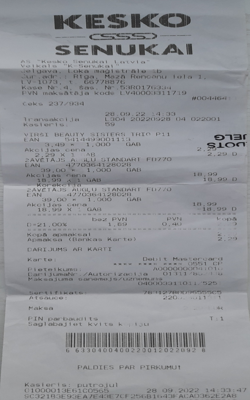

In [ ]:
import random

random_sample = random.randint(0, len(dataset))

print(f"Random sample is {random_sample}")
print(f"OCR text is {dataset[random_sample]['text']}")
dataset[random_sample]['image'].resize((250,400))
#     OCR text is {"company": "LIM SENG THO HARDWARE TRADING", "date": "29/12/2017", "address": "NO 7, SIMPANG OFF BATU VILLAGE, JALAN IPOH BATU 5, 51200 KUALA LUMPUR MALAYSIA", "total": "6.00"}


In [ ]:
new_special_tokens = [] # new tokens which will be added to the tokenizer
task_start_token = "<s>"  # start of task token
eos_token = "</s>" # eos token of tokenizer

def json2token(obj, update_special_tokens_for_json_key: bool = True, sort_json_key: bool = True):
    """
    Convert an ordered JSON object into a token sequence
    """
    if type(obj) == dict:
        if len(obj) == 1 and "text_sequence" in obj:
            return obj["text_sequence"]
        else:
            output = ""
            if sort_json_key:
                keys = sorted(obj.keys(), reverse=True)
            else:
                keys = obj.keys()
            for k in keys:
                if update_special_tokens_for_json_key:
                    new_special_tokens.append(fr"<s_{k}>") if fr"<s_{k}>" not in new_special_tokens else None
                    new_special_tokens.append(fr"</s_{k}>") if fr"</s_{k}>" not in new_special_tokens else None
                output += (
                    fr"<s_{k}>"
                    + json2token(obj[k], update_special_tokens_for_json_key, sort_json_key)
                    + fr"</s_{k}>"
                )
            return output
    elif type(obj) == list:
        return r"<sep/>".join(
            [json2token(item, update_special_tokens_for_json_key, sort_json_key) for item in obj]
        )
    else:
        # excluded special tokens for now
        obj = str(obj)
        if f"<{obj}/>" in new_special_tokens:
            obj = f"<{obj}/>"  # for categorical special tokens
        return obj


def preprocess_documents_for_donut(sample):
    # create Donut-style input
    text = json.loads(sample["text"])
    d_doc = task_start_token + json2token(text) + eos_token
    # convert all images to RGB
    image = sample["image"].convert('RGB')
    return {"image": image, "text": d_doc}

proc_dataset = dataset.map(preprocess_documents_for_donut)

print(f"Sample: {proc_dataset[15]['text']}")
print(f"New special tokens: {new_special_tokens + [task_start_token] + [eos_token]}")
#    Sample: <s><s_total>$6.90</s_total><s_date>27 MAR 2018</s_date><s_company>UNIHAKKA INTERNATIONAL SDN BHD</s_company><s_address>12, JALAN TAMPOI 7/4,KAWASAN PARINDUSTRIAN TAMPOI,81200 JOHOR BAHRU,JOHOR</s_address></s>
#    New special tokens: ['<s_total>', '</s_total>', '<s_date>', '</s_date>', '<s_company>', '</s_company>', '<s_address>', '</s_address>', '<s>', '</s>']


Map:   0%|          | 0/128 [00:00<?, ? examples/s]

Sample: <s><s_summa>3.98</s_summa><s_receipt_nr>00007520</s_receipt_nr><s_nosaukums>SIA "MANTANA"</s_nosaukums><s_laiks>12:01</s_laiks><s_datums>06.01.2022</s_datums><s_PVN_maksataja_numurs>53603077861</s_PVN_maksataja_numurs></s>
New special tokens: ['<s_summa>', '</s_summa>', '<s_receipt_nr>', '</s_receipt_nr>', '<s_nosaukums>', '</s_nosaukums>', '<s_laiks>', '</s_laiks>', '<s_datums>', '</s_datums>', '<s_PVN_maksataja_numurs>', '</s_PVN_maksataja_numurs>', '<s>', '</s>']


https://www.philschmid.de/fine-tuning-donut
https://github.com/zzzDavid/ICDAR-2019-SROIE
https://github.com/NielsRogge/Transformers-Tutorials/blob/master/Donut/CORD/Fine_tune_Donut_on_a_custom_dataset_(CORD)_with_PyTorch_Lightning.ipynb
https://towardsdatascience.com/ocr-free-document-understanding-with-donut-1acfbdf099be
https://github.com/zzzDavid/ICDAR-2019-SROIE/tree/master/data/key
https://huggingface.co/docs/transformers/model_doc/donut
https://saiashish90.medium.com/training-tesseract-ocr-with-custom-data-d3f4881575c0

In [ ]:
from transformers import DonutProcessor

# Load processor
processor = DonutProcessor.from_pretrained("naver-clova-ix/donut-base-finetuned-cord-v2")

# add new special tokens to tokenizer
processor.tokenizer.add_special_tokens({"additional_special_tokens": new_special_tokens + [task_start_token] + [eos_token]})

# we update some settings which differ from pretraining; namely the size of the images + no rotation required
# resizing the image to smaller sizes from [1920, 2560] to [960,1280]
processor.feature_extractor.size = [720,960] # should be (width, height)
processor.feature_extractor.do_align_long_axis = False


Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.


RuntimeError: ignored

In [ ]:

def transform_and_tokenize(sample, processor=processor, split="train", max_length=512, ignore_id=-100):
    # create tensor from image
    try:
        pixel_values = processor(
            sample["image"], random_padding=split == "train", return_tensors="pt"
        ).pixel_values.squeeze()
    except Exception as e:
        print(sample)
        print(f"Error: {e}")
        return {}

    # tokenize document
    input_ids = processor.tokenizer(
        sample["text"],
        add_special_tokens=False,
        max_length=max_length,
        padding="max_length",
        truncation=True,
        return_tensors="pt",
    )["input_ids"].squeeze(0)

    labels = input_ids.clone()
    labels[labels == processor.tokenizer.pad_token_id] = ignore_id  # model doesn't need to predict pad token
    return {"pixel_values": pixel_values, "labels": labels, "target_sequence": sample["text"]}

# need at least 32-64GB of RAM to run this
processed_dataset = proc_dataset.map(transform_and_tokenize,remove_columns=["image","text"])


Map:   0%|          | 0/128 [00:00<?, ? examples/s]

In [ ]:
processed_dataset = processed_dataset.train_test_split(test_size=0.01)
print(processed_dataset)

DatasetDict({
    train: Dataset({
        features: ['pixel_values', 'labels', 'target_sequence'],
        num_rows: 126
    })
    test: Dataset({
        features: ['pixel_values', 'labels', 'target_sequence'],
        num_rows: 2
    })
})


In [ ]:
import torch
from transformers import VisionEncoderDecoderModel, VisionEncoderDecoderConfig

# Load model from huggingface.co
model = VisionEncoderDecoderModel.from_pretrained("naver-clova-ix/donut-base-finetuned-cord-v2")

# Resize embedding layer to match vocabulary size
new_emb = model.decoder.resize_token_embeddings(len(processor.tokenizer))
print(f"New embedding size: {new_emb}")
# Adjust our image size and output sequence lengths
model.config.encoder.image_size = (processor.feature_extractor.size['height'], processor.feature_extractor.size['width'])


model.config.decoder.max_length = len(max(processed_dataset["train"]["labels"], key=len))

# Add task token for decoder to start
model.config.pad_token_id = processor.tokenizer.pad_token_id
model.config.decoder_start_token_id = processor.tokenizer.convert_tokens_to_ids(['<s>'])[0]

# is done by Trainer
# device = "cuda" if torch.cuda.is_available() else "cpu"
# model.to(device)

New embedding size: Embedding(57580, 1024, padding_idx=1)


In [ ]:
print(processor.feature_extractor.size)

{'height': 1280, 'width': 960}


In [ ]:
from huggingface_hub import HfFolder
from transformers import Seq2SeqTrainingArguments, Seq2SeqTrainer

# hyperparameters used for multiple args
hf_repository_id = "donut-base-finetuned-cord-v2-lv"

# Arguments for training
training_args = Seq2SeqTrainingArguments(
    output_dir=hf_repository_id,
    num_train_epochs=3,
    learning_rate=2e-5,
    per_device_train_batch_size=2,
    weight_decay=0.01,
    fp16=True,
    logging_steps=100,
    save_total_limit=2,
    evaluation_strategy="no",
    save_strategy="epoch",
    predict_with_generate=True,
    # push to hub parameters
    report_to="tensorboard",
    push_to_hub=True,
    hub_strategy="every_save",
    hub_model_id=hf_repository_id,
    hub_token=HfFolder.get_token(),
)

# Create Trainer
trainer = Seq2SeqTrainer(
    model=model,
    args=training_args,
    train_dataset=processed_dataset["train"],
)

Cloning https://huggingface.co/Inesence/donut-base-lv into local empty directory.
Using cuda_amp half precision backend


In [ ]:
# Start training
trainer.train()

The following columns in the training set don't have a corresponding argument in `VisionEncoderDecoderModel.forward` and have been ignored: target_sequence. If target_sequence are not expected by `VisionEncoderDecoderModel.forward`,  you can safely ignore this message.
/usr/local/lib/python3.8/dist-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
***** Running training *****
  Num examples = 126
  Num Epochs = 3
  Instantaneous batch size per device = 2
  Total train batch size (w. parallel, distributed & accumulation) = 2
  Gradient Accumulation steps = 1
  Total optimization steps = 189
  Number of trainable parameters = 201121912


Step,Training Loss
100,3.642800


Saving model checkpoint to donut-base-lv/checkpoint-63
Configuration saved in donut-base-lv/checkpoint-63/config.json
Configuration saved in donut-base-lv/checkpoint-63/generation_config.json
Model weights saved in donut-base-lv/checkpoint-63/pytorch_model.bin
Saving model checkpoint to donut-base-lv/checkpoint-126
Configuration saved in donut-base-lv/checkpoint-126/config.json
Configuration saved in donut-base-lv/checkpoint-126/generation_config.json
Model weights saved in donut-base-lv/checkpoint-126/pytorch_model.bin
Saving model checkpoint to donut-base-lv/checkpoint-189
Configuration saved in donut-base-lv/checkpoint-189/config.json
Configuration saved in donut-base-lv/checkpoint-189/generation_config.json
Model weights saved in donut-base-lv/checkpoint-189/pytorch_model.bin
Deleting older checkpoint [donut-base-lv/checkpoint-63] due to args.save_total_limit


Training completed. Do not forget to share your model on huggingface.co/models =)




TrainOutput(global_step=189, training_loss=2.375070561807622, metrics={'train_runtime': 681.4048, 'train_samples_per_second': 0.555, 'train_steps_per_second': 0.277, 'total_flos': 6.648595897982976e+17, 'train_loss': 2.375070561807622, 'epoch': 3.0})

In [ ]:
from huggingface_hub import notebook_login

notebook_login()

Token is valid.
Your token has been saved in your configured git credential helpers (store).
Your token has been saved to /root/.cache/huggingface/token
Login successful


In [ ]:
# Save processor and create model card
processor.save_pretrained(hf_repository_id)
trainer.create_model_card()
trainer.push_to_hub()

Image processor saved in donut-base-lv/preprocessor_config.json
tokenizer config file saved in donut-base-lv/tokenizer_config.json
Special tokens file saved in donut-base-lv/special_tokens_map.json
Dropping the following result as it does not have all the necessary fields:
{'dataset': {'name': 'imagefolder', 'type': 'imagefolder', 'config': 'default', 'split': 'train', 'args': 'default'}}
Saving model checkpoint to donut-base-lv
Configuration saved in donut-base-lv/config.json
Configuration saved in donut-base-lv/generation_config.json
Model weights saved in donut-base-lv/pytorch_model.bin


Upload file sentencepiece.bpe.model:   3%|2         | 32.0k/1.24M [00:00<?, ?B/s]

Upload file runs/Feb22_21-48-56_5061e17b29ce/events.out.tfevents.1677102949.5061e17b29ce.173.0: 100%|#########…

remote: Scanning LFS files for validity...        
remote: LFS file scan complete.        
To https://huggingface.co/Inesence/donut-base-lv
   3be5541..f4240da  main -> main

remote: LFS file scan complete.        
To https://huggingface.co/Inesence/donut-base-lv
   3be5541..f4240da  main -> main

Dropping the following result as it does not have all the necessary fields:
{'dataset': {'name': 'imagefolder', 'type': 'imagefolder', 'config': 'default', 'split': 'train', 'args': 'default'}}


'https://huggingface.co/Inesence/donut-base-lv/commit/f4240da146966d73f64e7d95267af907d40104fd'

In [ ]:
import re
import transformers
from PIL import Image
from transformers import DonutProcessor, VisionEncoderDecoderModel
import torch
import random
import numpy as np

# hidde logs
transformers.logging.disable_default_handler()


# Load our model from Hugging Face
processor = DonutProcessor.from_pretrained("inesence/donut-base-finetuned-cord-v2-lv")
model = VisionEncoderDecoderModel.from_pretrained("inesence/donut-base-finetuned-cord-v2-lv")

# Move model to GPU
device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)

# Load random document image from the test set
test_sample = processed_dataset["test"][0]

def run_prediction(sample, model=model, processor=processor):
    # prepare inputs
    pixel_values = torch.tensor(test_sample["pixel_values"]).unsqueeze(0)
    task_prompt = "<s>"
    decoder_input_ids = processor.tokenizer(task_prompt, add_special_tokens=False, return_tensors="pt").input_ids

    # run inference
    outputs = model.generate(
        pixel_values.to(device),
        decoder_input_ids=decoder_input_ids.to(device),
        max_length=model.decoder.config.max_position_embeddings,
        early_stopping=True,
        pad_token_id=processor.tokenizer.pad_token_id,
        eos_token_id=processor.tokenizer.eos_token_id,
        use_cache=True,
        num_beams=1,
        bad_words_ids=[[processor.tokenizer.unk_token_id]],
        return_dict_in_generate=True,
    )

    # process output
    prediction = processor.batch_decode(outputs.sequences)[0]
    prediction = processor.token2json(prediction)

    # load reference target
    target = processor.token2json(test_sample["target_sequence"])
    return prediction, target

prediction, target = run_prediction(test_sample)
print(f"Reference:\n {target}")
print(f"Prediction:\n {prediction}")



Reference:
 {'summa': '3.90', 'receipt_nr': '00016563', 'nosaukums': 'SIA "KONGS"', 'laiks': '12:49', 'datums': '14.05.2022', 'PVN_maksataja_numurs': '43603006320'}
Prediction:
 {'text_sequence': '4101151EA85</s>'}


In [ ]:
from tqdm import tqdm

# define counter for samples
true_counter = 0
total_counter = 0

# iterate over dataset
for sample in tqdm(processed_dataset["test"]):
  prediction, target = run_prediction(test_sample)
  for s in zip(prediction.values(), target.values()):
    if s[0] == s[1]:
      true_counter += 1
    total_counter += 1

print(f"Accuracy: {(true_counter/total_counter)*100}%")
# Accuracy: 75.0%


100%|██████████| 2/2 [00:02<00:00,  1.43s/it]

Accuracy: 0.0%
